In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

In [2]:
tor = pd.read_csv('tor.csv')

In [3]:
tor.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [4]:
tor = tor.drop(['Source IP', ' Destination IP'], axis=1)

In [5]:
tor

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,53913,80,6,435,0.0,4597.701149,435.0,0.0,435,435,...,0,0,0,0,0,0,0,0,0,nonTOR
1,53913,80,6,259,0.0,7722.007722,259.0,0.0,259,259,...,0,0,0,0,0,0,0,0,0,nonTOR
2,53913,80,6,891,0.0,2244.668911,891.0,0.0,891,891,...,0,0,0,0,0,0,0,0,0,nonTOR
3,53913,80,6,1074,0.0,1862.197393,1074.0,0.0,1074,1074,...,0,0,0,0,0,0,0,0,0,nonTOR
4,53913,80,6,315,0.0,6349.206349,315.0,0.0,315,315,...,0,0,0,0,0,0,0,0,0,nonTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67829,7116,1900,17,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,nonTOR
67830,7116,1900,17,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,nonTOR
67831,11365,443,6,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,nonTOR
67832,13000,64584,6,0,NaN,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [6]:
tor.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,67834.000000,67834.000000,67834.000000,6.783400e+04,6.783200e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,6.783400e+04,...,6.783400e+04,6.783400e+04,6.783400e+04,67834.0,6.783400e+04,6.783400e+04,6.783400e+04,67834.0,6.783400e+04,6.783400e+04
mean,37912.753324,11566.395967,12.167291,2.991884e+06,inf,inf,3.155927e+05,2.209662e+05,8.983857e+05,1.924432e+05,...,4.760216e+05,5.158576e+04,3.887655e+04,0.0,3.887655e+04,3.887655e+04,3.085054e+05,0.0,3.085054e+05,3.085054e+05
std,20986.077326,18374.765123,5.459410,4.063005e+06,NaN,NaN,6.988069e+05,6.409506e+05,1.738476e+06,5.780313e+05,...,1.409648e+06,4.873526e+05,3.154634e+05,0.0,3.154634e+05,3.154634e+05,1.453953e+06,0.0,1.453953e+06,1.453953e+06
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,2.002581e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,19305.000000,137.000000,6.000000,4.435975e+04,1.046553e+02,4.861712e+00,9.951270e+03,0.000000e+00,2.892575e+04,2.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,43677.000000,443.000000,17.000000,4.108570e+05,1.331365e+03,1.631734e+01,8.344079e+04,0.000000e+00,1.786225e+05,1.371500e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54685.000000,16311.000000,17.000000,7.325550e+06,2.170103e+04,1.007038e+02,4.106090e+05,5.790789e+04,4.641098e+05,2.075310e+05,...,8.278800e+04,1.700000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,1.000000e+07,inf,inf,9.987113e+06,7.045491e+06,9.998126e+06,9.987113e+06,...,9.996903e+06,9.996903e+06,4.999893e+06,0.0,4.999893e+06,4.999893e+06,9.998126e+06,0.0,9.998126e+06,9.998126e+06


In [7]:
print(tor.shape)
print(tor.isnull().sum())

(67834, 27)
 Source Port         0
 Destination Port    0
 Protocol            0
 Flow Duration       0
 Flow Bytes/s        2
 Flow Packets/s      0
 Flow IAT Mean       0
 Flow IAT Std        0
 Flow IAT Max        0
 Flow IAT Min        0
Fwd IAT Mean         0
 Fwd IAT Std         0
 Fwd IAT Max         0
 Fwd IAT Min         0
Bwd IAT Mean         0
 Bwd IAT Std         0
 Bwd IAT Max         0
 Bwd IAT Min         0
Active Mean          0
 Active Std          0
 Active Max          0
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
label                0
dtype: int64


In [8]:
tor=tor.dropna()

In [9]:
tor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67832 entries, 0 to 67831
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    Source Port       67832 non-null  int64  
 1    Destination Port  67832 non-null  int64  
 2    Protocol          67832 non-null  int64  
 3    Flow Duration     67832 non-null  int64  
 4    Flow Bytes/s      67832 non-null  float64
 5    Flow Packets/s    67832 non-null  float64
 6    Flow IAT Mean     67832 non-null  float64
 7    Flow IAT Std      67832 non-null  float64
 8    Flow IAT Max      67832 non-null  int64  
 9    Flow IAT Min      67832 non-null  int64  
 10  Fwd IAT Mean       67832 non-null  float64
 11   Fwd IAT Std       67832 non-null  float64
 12   Fwd IAT Max       67832 non-null  int64  
 13   Fwd IAT Min       67832 non-null  int64  
 14  Bwd IAT Mean       67832 non-null  float64
 15   Bwd IAT Std       67832 non-null  float64
 16   Bwd IAT Max       678

In [10]:
vc=tor['label'].value_counts()
vc

nonTOR    59788
TOR        8044
Name: label, dtype: int64

In [11]:
tor.shape

(67832, 27)

In [12]:
column_name = list(tor.columns)

In [13]:
column_name

[' Source Port',
 ' Destination Port',
 ' Protocol',
 ' Flow Duration',
 ' Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Active Mean',
 ' Active Std',
 ' Active Max',
 ' Active Min',
 'Idle Mean',
 ' Idle Std',
 ' Idle Max',
 ' Idle Min',
 'label']

In [14]:
SourcePortList = tor[' Source Port']
DestinationPortList = tor[' Destination Port']
ProtocolList = tor[' Protocol']
FlowDurationList = tor[' Flow Duration']
FlowIATMeanList = tor[' Flow IAT Mean']
FlowIATStdList = tor[' Flow IAT Std']
FlowIATMaxList = tor[' Flow IAT Max']
FlowIATMinList = tor[' Flow IAT Min']
BwdIATMinList = tor[' Bwd IAT Min']
ActiveMeanList = tor['Active Mean']
ActiveStdList = tor[' Active Std']
ActiveMaxList = tor[' Active Max']
ActiveMinList = tor[' Active Min']
IdleMeanList = tor['Idle Mean']
IdleStdList = tor[' Idle Std']
IdleMaxList = tor[' Idle Max']
IdleMinList = tor[' Idle Min']

In [15]:
combinedList = list(zip(SourcePortList, DestinationPortList, ProtocolList, FlowDurationList, FlowIATMeanList, FlowIATStdList, FlowIATMaxList, FlowIATMinList, BwdIATMinList, ActiveMeanList, ActiveStdList, ActiveMaxList, ActiveMinList, IdleMeanList, IdleStdList, IdleMaxList, IdleMinList))

In [16]:
combinedList

[(53913, 80, 6, 435, 435.0, 0.0, 435, 435, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 259, 259.0, 0.0, 259, 259, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 891, 891.0, 0.0, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 1074, 1074.0, 0.0, 1074, 1074, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 315, 315.0, 0.0, 315, 315, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 4841, 4841.0, 0.0, 4841, 4841, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 581, 581.0, 0.0, 581, 581, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 906, 906.0, 0.0, 906, 906, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 401, 401.0, 0.0, 401, 401, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913, 80, 6, 760, 760.0, 0.0, 760, 760, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (53913,
  80,
  6,
  4832236,
  2416118.0,
  3416355.30060443,
  4831846,
  390,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (55727,
  32620,
  6,
  51872,
  25936.0,
  36488.1241227882,
  51737,
  135,
  51737,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0),
 (51716,
  443,
  6,
  30

In [17]:
for i in range(len(tor['label'])):
    if tor['label'][i] == 'TOR':
        tor['label'][i] = 1
    else:
        tor['label'][i] = 0

C:\Users\Admin\AppData\Local\Temp\ipykernel_7288\3531101248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor['label'][i] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_7288\3531101248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor['label'][i] = 1


In [23]:
tor['label']

0        0
1        0
2        0
3        0
4        0
        ..
67827    0
67828    0
67829    0
67830    0
67831    0
Name: label, Length: 67832, dtype: object

In [24]:
vc = tor['label'].value_counts()
vc

0    59788
1     8044
Name: label, dtype: int64

In [25]:
# import seaborn as sns
# sns.countplot(data=tor, x=vc.values)

In [26]:
tor

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,53913,80,6,435,0.0,4.597701e+03,435.0,0.0,435,435,...,0,0,0,0,0,0,0,0,0,0
1,53913,80,6,259,0.0,7.722008e+03,259.0,0.0,259,259,...,0,0,0,0,0,0,0,0,0,0
2,53913,80,6,891,0.0,2.244669e+03,891.0,0.0,891,891,...,0,0,0,0,0,0,0,0,0,0
3,53913,80,6,1074,0.0,1.862197e+03,1074.0,0.0,1074,1074,...,0,0,0,0,0,0,0,0,0,0
4,53913,80,6,315,0.0,6.349206e+03,315.0,0.0,315,315,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67827,68,67,17,1,600000000.0,2.000000e+06,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
67828,34251,443,6,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
67829,7116,1900,17,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
67830,7116,1900,17,0,inf,inf,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
print('relevant layers imported')

relevant layers imported


In [28]:
target_value = list()

In [29]:
for t in tor['label']:
    target_value.append(t)
  

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
random_state = 1
X = combinedList
y = target_value

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random_state, stratify=y)

In [33]:
print("Number of training samples: {}".format(len(X_train)))
print("Number of testing samples: {}".format(len(X_test)))

Number of training samples: 54265
Number of testing samples: 13567


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
randomForest = RandomForestClassifier(max_depth=2, random_state=random_state)
decisionTree = DecisionTreeClassifier(random_state = random_state)

In [36]:
randomForest.fit(X_train, y_train)
print("Random Forest fitted")
decisionTree.fit(X_train, y_train)
print("Decision Tree fitted")

Random Forest fitted
Decision Tree fitted


In [37]:
randomForestResult = randomForest.score(X_test, y_test)
decisionTreeResult = decisionTree.score(X_test, y_test)

In [38]:
print('Random Forest: {:.2f}'.format(randomForestResult))
print('Decision Tree: {:.2f}'.format(decisionTreeResult))

Random Forest: 0.92
Decision Tree: 0.99


In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('KNN:')
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN:
[[11732   226]
 [  380  1229]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11958
           1       0.84      0.76      0.80      1609

    accuracy                           0.96     13567
   macro avg       0.91      0.87      0.89     13567
weighted avg       0.95      0.96      0.95     13567



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(knn_pred,y_test))
print("Precision: ", precision_score(knn_pred,y_test))
print("Recall: ", recall_score(knn_pred,y_test))
print("F1 Score: ", f1_score(knn_pred,y_test))

Accuracy:  0.9553327928060735
Precision:  0.7638284648850218
Recall:  0.8446735395189003
F1 Score:  0.802219321148825


<AxesSubplot:>

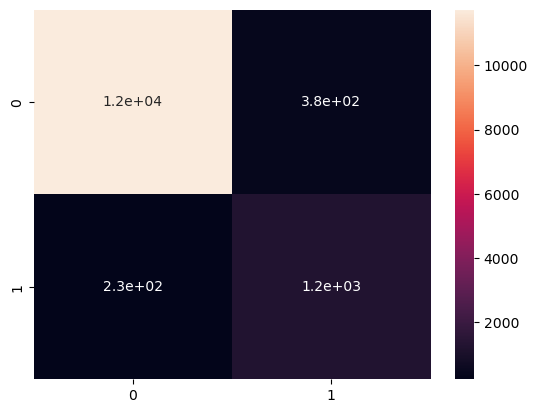

In [41]:
import seaborn as sns
c = confusion_matrix(knn_pred,y_test)
sns.heatmap(c,annot=True)

|Algo|Accuracy|Precision|Recall|f1Score|
|---|---|---|---|---|
|KNN|0.9553327928060735|0.7638284648850218|0.8446735395189003|0.802219321148825|
|Naive bayes|0.760079604923712|0.9366065879428216|0.32339055793991417|0.48077843356197164|
|Random forest|0.9894597184344365|0.9316345556246115|0.9784595300261096|0.9544730977395733|
|Logistic Regression|0.9311564826417041|0.6264760720944687|0.7516778523489933|0.6833898305084747|
|DecisionTree|||||



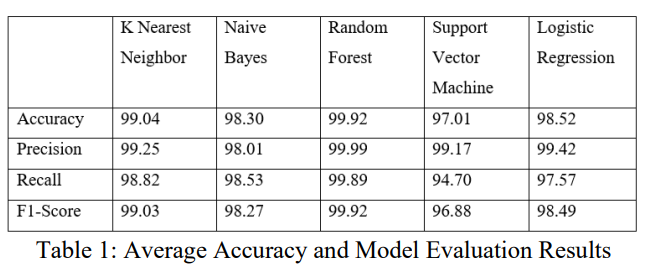

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print('Naive Bayes:')
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes:
[[8805 3153]
 [ 102 1507]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84     11958
           1       0.32      0.94      0.48      1609

    accuracy                           0.76     13567
   macro avg       0.66      0.84      0.66     13567
weighted avg       0.91      0.76      0.80     13567



In [43]:
print("Accuracy: ", accuracy_score(nb_pred,y_test))
print("Precision: ", precision_score(nb_pred,y_test))
print("Recall: ", recall_score(nb_pred,y_test))
print("F1 Score: ", f1_score(nb_pred,y_test))

Accuracy:  0.760079604923712
Precision:  0.9366065879428216
Recall:  0.32339055793991417
F1 Score:  0.48077843356197164


<AxesSubplot:>

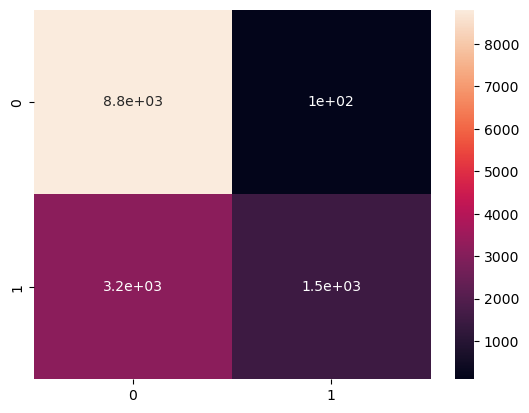

In [44]:
import seaborn as sns
c = confusion_matrix(nb_pred,y_test)
sns.heatmap(c,annot=True)

In [45]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('Random Forest:')
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest:
[[11925    33]
 [  110  1499]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11958
           1       0.98      0.93      0.95      1609

    accuracy                           0.99     13567
   macro avg       0.98      0.96      0.97     13567
weighted avg       0.99      0.99      0.99     13567



In [41]:
print("Accuracy: ", accuracy_score(rf_pred,y_test))
print("Precision: ", precision_score(rf_pred,y_test))
print("Recall: ", recall_score(rf_pred,y_test))
print("F1 Score: ", f1_score(rf_pred,y_test))

Accuracy:  0.9894597184344365
Precision:  0.9316345556246115
Recall:  0.9784595300261096
F1 Score:  0.9544730977395733


In [42]:
from sklearn.metrics import accuracy_score

<AxesSubplot:>

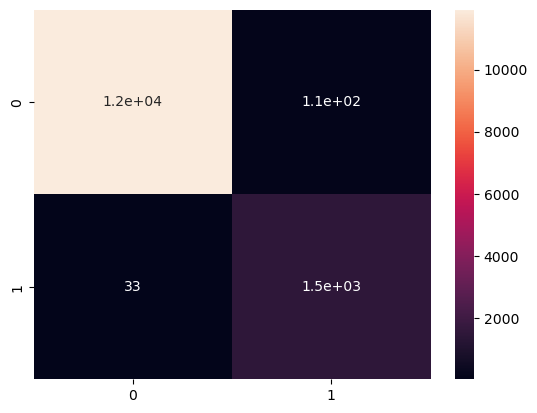

In [43]:
import seaborn as sns
c = confusion_matrix(rf_pred, y_test)
sns.heatmap(c,annot=True)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)

print('Logistic Regression:')
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression:
[[11625   333]
 [  601  1008]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11958
           1       0.75      0.63      0.68      1609

    accuracy                           0.93     13567
   macro avg       0.85      0.80      0.82     13567
weighted avg       0.93      0.93      0.93     13567



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print("Accuracy: ", accuracy_score(lr_pred,y_test))
print("Precision: ", precision_score(lr_pred,y_test))
print("Recall: ", recall_score(lr_pred,y_test))
print("F1 Score: ", f1_score(lr_pred,y_test))

Accuracy:  0.9311564826417041
Precision:  0.6264760720944687
Recall:  0.7516778523489933
F1 Score:  0.6833898305084747


<AxesSubplot:>

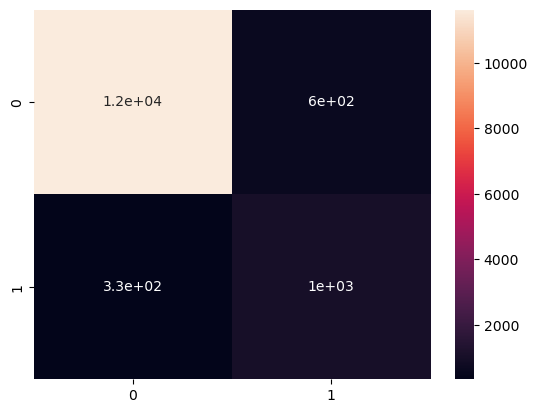

In [46]:
import seaborn as sns
c = confusion_matrix(lr_pred,y_test)
sns.heatmap(c,annot=True)

In [47]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

print('SVM:')
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

SVM:
[[11108   850]
 [  573  1036]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11958
           1       0.55      0.64      0.59      1609

    accuracy                           0.90     13567
   macro avg       0.75      0.79      0.77     13567
weighted avg       0.90      0.90      0.90     13567



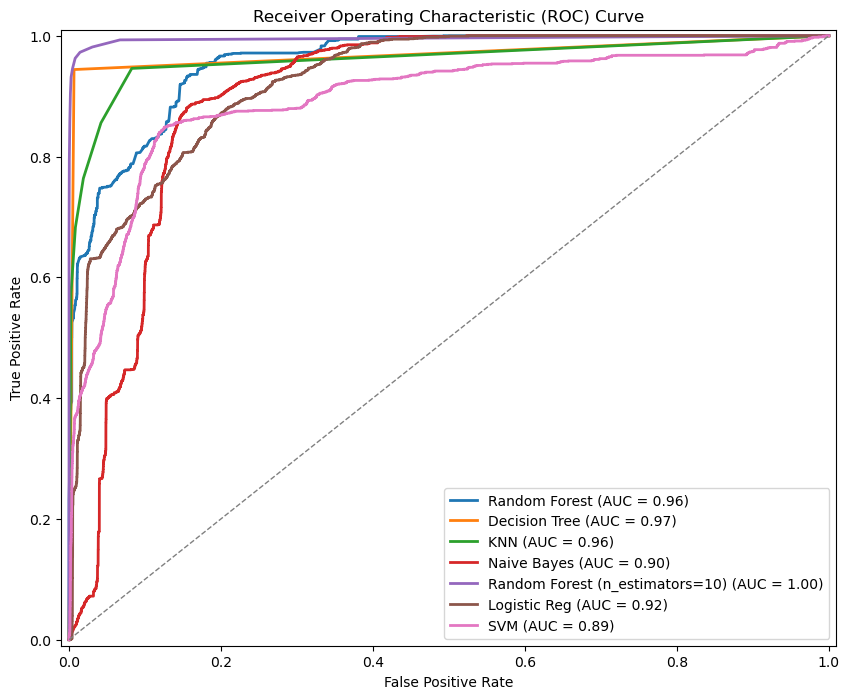

In [48]:
from sklearn.metrics import roc_curve, auc

classifiers = [randomForest, decisionTree, knn, nb, rf, lr, clf]
classifier_names = ['Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest (n_estimators=10)','Logistic Reg','SVM']
plt.figure(figsize=(10, 8))
for i, classifier in enumerate(classifiers):
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(X_test)[:, 1]
    else:
        y_score = classifier.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(classifier_names[i], roc_auc))


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [46]:
!pip install -U keras-tuner


     -------------------------------------- 176.1/176.1 kB 3.6 MB/s eta 0:00:00


In [48]:
import kerastuner as kt

In [52]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_normalized = (X_test - np.mean(X_train)) / np.std(X_train)


class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', 16, 128, step=16),
                        activation=hp.Choice('activation_1', values=['relu', 'sigmoid']),
                        input_shape=self.input_shape))
        model.add(Dense(units=hp.Int('units_2', 8, 64, step=8),
                        activation=hp.Choice('activation_2', values=['relu', 'sigmoid'])))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-5, 1e-4, 1e-3, 1e-2])),
                      metrics=['accuracy'])
        return model


hypermodel = MyHyperModel(input_shape=X_train_normalized.shape[1:])

tuner = RandomSearch(hypermodel,
                     objective='val_loss',
                     max_trials=50,
                     executions_per_trial=1,
                     directory='keras_tuner',
                     project_name='my_model')

tuner.search(x=np.array(X_train_normalized),
             y=np.array(y_train),
             epochs=10,
             batch_size=10,
             validation_data=(np.array(X_test_normalized), np.array(y_test)))

best_model = tuner.get_best_models(1)[0]

loss, accuracy = best_model.evaluate(np.array(X_test_normalized), np.array(y_test))
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Trial 50 Complete [00h 01m 36s]
val_loss: 0.14304396510124207

Best val_loss So Far: 0.1215757504105568
Total elapsed time: 00h 01m 36s
INFO:tensorflow:Oracle triggered exit
424/424 [==============================] - 1s 1ms/step - loss: 0.1216 - accuracy: 0.9494
Test loss: 0.12157582491636276
Test accuracy: 0.9494361281394958


In [56]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
import optuna


X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

def build_model(trial):
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units_1', 8, 64, step=8), activation=trial.suggest_categorical('activation_1', ['relu', 'sigmoid']), input_shape=X_train_normalized.shape[1:]))
    model.add(Dense(units=trial.suggest_int('units_2', 4, 32, step=4), activation=trial.suggest_categorical('activation_2', ['relu', 'sigmoid'])))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=trial.suggest_categorical('learning_rate', [0.0001, 0.001])),
                  metrics=['accuracy'])
    return model

def objective(trial):
    model = build_model(trial)

    history = model.fit(np.array(X_train_normalized), np.array(y_train),
                        validation_data=(np.array(X_test_normalized), np.array(y_test)),
                        epochs=20,
                        batch_size=10,
                        verbose=0)

    val_loss = history.history['val_loss'][-1]
    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
best_model = build_model(optuna.trial.FixedTrial(best_params))

best_model.fit(np.array(X_train_normalized), np.array(y_train),
               validation_data=(np.array(X_test_normalized), np.array(y_test)),
               epochs=100,
               batch_size=10,
               verbose=0)

loss, accuracy = best_model.evaluate(np.array(X_test_normalized), np.array(y_test))
print('Test loss:', loss)
print('Test accuracy:', accuracy)




[I 2023-05-16 23:34:27,651] A new study created in memory with name: no-name-cc79ce26-3130-4eb0-9700-88f72bbedd15
[I 2023-05-16 23:36:23,518] Trial 0 finished with value: 0.14950719475746155 and parameters: {'units_1': 40, 'activation_1': 'relu', 'units_2': 32, 'activation_2': 'sigmoid', 'learning_rate': 0.001}. Best is trial 0 with value: 0.14950719475746155.
[I 2023-05-16 23:38:10,341] Trial 1 finished with value: 0.21690350770950317 and parameters: {'units_1': 16, 'activation_1': 'sigmoid', 'units_2': 12, 'activation_2': 'relu', 'learning_rate': 0.0001}. Best is trial 0 with value: 0.14950719475746155.
[I 2023-05-16 23:40:09,452] Trial 2 finished with value: 0.21310564875602722 and parameters: {'units_1': 24, 'activation_1': 'sigmoid', 'units_2': 12, 'activation_2': 'relu', 'learning_rate': 0.0001}. Best is trial 0 with value: 0.14950719475746155.
[I 2023-05-16 23:41:58,816] Trial 3 finished with value: 0.2010461539030075 and parameters: {'units_1': 40, 'activation_1': 'sigmoid', 'u

424/424 [==============================] - 0s 883us/step - loss: 0.1595 - accuracy: 0.9429
Test loss: 0.15947532653808594
Test accuracy: 0.9428761005401611


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
import optuna


X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

def build_model(trial):
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units_1', 8, 64, step=8), activation=trial.suggest_categorical('activation_1', ['relu', 'sigmoid']), input_shape=X_train_normalized.shape[1:]))
    model.add(Dense(units=trial.suggest_int('units_2', 4, 32, step=4), activation=trial.suggest_categorical('activation_2', ['relu', 'sigmoid'])))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=trial.suggest_categorical('learning_rate', [0.0001, 0.01])),
                  metrics=['accuracy'])
    return model

def objective(trial):
    model = build_model(trial)

    history = model.fit(np.array(X_train_normalized), np.array(y_train),
                        validation_data=(np.array(X_test_normalized), np.array(y_test)),
                        epochs=50,
                        batch_size=10,
                        verbose=0)

    val_loss = history.history['val_loss'][-1]
    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
best_model = build_model(optuna.trial.FixedTrial(best_params))

best_model.fit(np.array(X_train_normalized), np.array(y_train),
               validation_data=(np.array(X_test_normalized), np.array(y_test)),
               epochs=50,
               batch_size=10,
               verbose=0)

loss, accuracy = best_model.evaluate(np.array(X_test_normalized), np.array(y_test))
print('Test loss:', loss)
print('Test accuracy:', accuracy)


[I 2023-05-17 01:23:39,851] A new study created in memory with name: no-name-ddc730f6-10a7-44af-80fc-6e68e1a90957
[I 2023-05-17 01:30:40,523] Trial 0 finished with value: 0.16467192769050598 and parameters: {'units_1': 8, 'activation_1': 'relu', 'units_2': 16, 'activation_2': 'relu', 'learning_rate': 0.0001}. Best is trial 0 with value: 0.16467192769050598.
[I 2023-05-17 01:41:28,856] Trial 1 finished with value: 0.14824026823043823 and parameters: {'units_1': 48, 'activation_1': 'relu', 'units_2': 24, 'activation_2': 'relu', 'learning_rate': 0.0001}. Best is trial 1 with value: 0.14824026823043823.
[I 2023-05-17 01:52:17,195] Trial 2 finished with value: 0.23303848505020142 and parameters: {'units_1': 64, 'activation_1': 'relu', 'units_2': 12, 'activation_2': 'sigmoid', 'learning_rate': 0.01}. Best is trial 1 with value: 0.14824026823043823.


In [38]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import optuna


X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_normalized = (X_test - np.mean(X_train)) / np.std(X_train)

def build_model(trial):
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units_1', 16, 128, step=16),
                    activation=trial.suggest_categorical('activation_1', ['relu', 'sigmoid']),
                    input_shape=X_train_normalized.shape[1:]))
    model.add(Dense(units=trial.suggest_int('units_2', 8, 64, step=8),
                    activation=trial.suggest_categorical('activation_2', ['relu', 'sigmoid'])))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)),
                  metrics=['accuracy'])
    return model

def objective(trial):
    model = build_model(trial)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(np.array(X_train_normalized), np.array(y_train),
                        validation_data=(np.array(X_test_normalized), np.array(y_test)),
                        epochs=100,
                        batch_size=10,
                        callbacks=[early_stopping],
                        verbose=0)

    val_loss = history.history['val_loss'][-1]
    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_trial.params
best_model = build_model(optuna.trial.FixedTrial(best_params))

best_model.fit(np.array(X_train_normalized), np.array(y_train),
               validation_data=(np.array(X_test_normalized), np.array(y_test)),
               epochs=100,
               batch_size=10,
               verbose=0)

loss, accuracy = best_model.evaluate(np.array(X_test_normalized), np.array(y_test))
print('Test loss:', loss)
print('Test accuracy:', accuracy)


[I 2023-05-17 12:52:12,220] A new study created in memory with name: no-name-b24ff92e-f5f2-469e-89a0-8f0fa50fad94
C:\Users\Admin\AppData\Local\Temp\ipykernel_10272\887054040.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)),
[I 2023-05-17 12:56:10,702] Trial 0 finished with value: 0.1919962763786316 and parameters: {'units_1': 112, 'activation_1': 'relu', 'units_2': 8, 'activation_2': 'relu', 'learning_rate': 0.0073859344729044684}. Best is trial 0 with value: 0.1919962763786316.
[I 2023-05-17 13:08:33,666] Trial 1 finished with value: 0.13755737245082855 and parameters: {'units_1': 48, 'activation_1': 'sigmoid', 'units_2': 16, 'activation_2': 'relu', 'learning_rate': 0.00143608956991217}. Best is trial 1 with value: 0.1375573724

KeyboardInterrupt: 

In [49]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [117]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers


X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

model = Sequential()
model.add(Dense(16, input_dim=X_train_normalized.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001)


model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), input_dim=X_train_normalized.shape[1], activation='relu'))
model.add(Dense(8, kernel_regularizer=regularizers.l2(0.01), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


model.fit(np.array(X_train_normalized), y_train, epochs=100, batch_size=10)


loss, accuracy = model.evaluate(np.array(X_test_normalized), np.array(y_test))
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.7636 - accuracy: 0.8500 
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.8857
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.8857
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.8857
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.8857
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8857
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8857
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8857
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8857
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8857
Epoch 11

28/28 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8857
Epoch 84/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8857
Epoch 85/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8857
Epoch 86/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8857
Epoch 87/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8857
Epoch 88/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8857
Epoch 89/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8857
Epoch 90/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8857
Epoch 91/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8857
Epoch 92/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8857
Epoch 93/100


In [118]:
ann_pred = model.predict(X_test)
ann_pred = (ann_pred > 0.5)

424/424 [==============================] - 0s 746us/step


In [119]:
print('Artificial Neural Network:')
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

Artificial Neural Network:
[[11958     0]
 [ 1609     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11958
           1       0.00      0.00      0.00      1609

    accuracy                           0.88     13567
   macro avg       0.44      0.50      0.47     13567
weighted avg       0.78      0.88      0.83     13567



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


y_train = np.array(y_train)
y_test = np.array(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_normalized, y_train, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adagrad(learning_rate=0.01)


model.compile(loss='hinge', optimizer=optimizer, metrics=['accuracy'])


model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


loss, accuracy = model.evaluate(X_test_normalized, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/30
9/9 [==============================] - 1s 23ms/step - loss: 1.7618 - accuracy: 0.7000 - val_loss: 1.7409 - val_accuracy: 0.9008
Epoch 2/30
9/9 [==============================] - 0s 7ms/step - loss: 1.7154 - accuracy: 0.7929 - val_loss: 1.6959 - val_accuracy: 0.9008
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 1.6811 - accuracy: 0.8464 - val_loss: 1.6592 - val_accuracy: 0.9008
Epoch 4/30
9/9 [==============================] - 0s 8ms/step - loss: 1.6509 - accuracy: 0.8750 - val_loss: 1.6284 - val_accuracy: 0.9008
Epoch 5/30
9/9 [==============================] - 0s 9ms/step - loss: 1.6084 - accuracy: 0.8821 - val_loss: 1.6027 - val_accuracy: 0.9008
Epoch 6/30
9/9 [==============================] - 0s 8ms/step - loss: 1.6019 - accuracy: 0.8786 - val_loss: 1.5798 - val_accuracy: 0.9008
Epoch 7/30
9/9 [==============================] - 0s 9ms/step - loss: 1.5815 - accuracy: 0.8786 - val_loss: 1.5597 - val_accuracy: 0.9008
Epoch 8/30
9/9 [=================

In [114]:
ann_pred = model.predict(X_test)
ann_pred = (ann_pred > 0.5)

424/424 [==============================] - 0s 779us/step


In [115]:
print('Artificial Neural Network:')
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

Artificial Neural Network:
[[11958     0]
 [ 1609     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11958
           1       0.00      0.00      0.00      1609

    accuracy                           0.88     13567
   macro avg       0.44      0.50      0.47     13567
weighted avg       0.78      0.88      0.83     13567



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras.losses import hinge

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10)


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100
5427/5427 [==============================] - 14s 2ms/step - loss: 1454.6578 - accuracy: 0.8771
Epoch 2/100
5427/5427 [==============================] - 13s 2ms/step - loss: 378.1815 - accuracy: 0.8867
Epoch 3/100
5427/5427 [==============================] - 13s 2ms/step - loss: 160.6789 - accuracy: 0.9116
Epoch 4/100
5427/5427 [==============================] - 12s 2ms/step - loss: 5.2486 - accuracy: 0.8880
Epoch 5/100
5427/5427 [==============================] - 13s 2ms/step - loss: 0.9509 - accuracy: 0.8786
Epoch 6/100
5427/5427 [==============================] - 13s 2ms/step - loss: 0.4036 - accuracy: 0.8794
Epoch 7/100
5427/5427 [==============================] - 13s 2ms/step - loss: 0.3057 - accuracy: 0.8812
Epoch 8/100
5427/5427 [==============================] - 14s 3ms/step - loss: 0.3255 - accuracy: 0.8813
Epoch 9/100
5427/5427 [==============================] - 13s 2ms/step - loss: 0.3347 - accuracy: 0.8812
Epoch 10/100
5427/5427 [==============================] -

In [77]:
ann_pred = model.predict(X_test)
ann_pred = (ann_pred > 0.5)

424/424 [==============================] - 0s 781us/step


In [78]:
print('Artificial Neural Network:')
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

Artificial Neural Network:
[[11958     0]
 [ 1609     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11958
           1       0.00      0.00      0.00      1609

    accuracy                           0.88     13567
   macro avg       0.44      0.50      0.47     13567
weighted avg       0.78      0.88      0.83     13567



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
import os
model_version = max([int(i) for i in os.listdir("E:/tor") + [0]])+1
model.save(f"E:/tor/{model_version}")

INFO:tensorflow:Assets written to: E:/tor/6\assets


INFO:tensorflow:Assets written to: E:/tor/6\assets
